# DAT300 - Compulsory assignment 1

## Group 9
Group name: Goofy  
  
## Members
- Joel Teklemariam
- Artush Mkrtchyan

# Introduction

From what we have understood, the task is to make an ensemble model, a classification model and an ANN to predict forest types in different national parks. We are then going to compare the results and conclude which one was the best. 

Our roles are exactly the same, because most of the time we have been sitting together to complete this assignment. That means both of us have coded and written text like this one.

# Data pre-processing and visualisation

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam, Adamax, Adadelta
from tensorflow.keras.layers import LeakyReLU, PReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


As seen above, we're importing what we think we may need for this project

In [ ]:
raw_data = pd.read_csv('/content/train.csv', index_col=0, delimiter=';') # Naming the train data "raw_data"
test_data = pd.read_csv('/content/test.csv', index_col=0, delimiter=';') # Naming the test data "test_data"

In [ ]:
print(raw_data.isnull().sum()) # Checking how many NaN there are
raw_data.head()
raw_data.info()

National Park                                          0
Elevation (meters)                                     0
Aspect (azimuth)                                       0
Slope (degrees)                                        0
Horizontal distance to water (meters)                  0
Vertical distance to water (meters)                    0
Horizontal distance to road (meters)                   0
Light at 9AM (hillshade)                               0
Light at noon (hillshade)                              0
Light at 3PM (hillshade)                               0
Horizontal distance to fire ignition point (meters)    0
Soil 1                                                 0
Soil 2                                                 0
Soil 3                                                 0
Soil 4                                                 0
Soil 5                                                 0
Soil 6                                                 0
Soil 7                         

In [ ]:
print(test_data.isnull().sum()) # Checking how many NaN there are
test_data.head()
test_data.info()

National Park                                          0
Elevation (meters)                                     0
Aspect (azimuth)                                       0
Slope (degrees)                                        0
Horizontal distance to water (meters)                  0
Vertical distance to water (meters)                    0
Horizontal distance to road (meters)                   0
Light at 9AM (hillshade)                               0
Light at noon (hillshade)                              0
Light at 3PM (hillshade)                               0
Horizontal distance to fire ignition point (meters)    0
Soil 1                                                 0
Soil 2                                                 0
Soil 3                                                 0
Soil 4                                                 0
Soil 5                                                 0
Soil 6                                                 0
Soil 7                         

What we found out is that this dataset does not contain any NaN values

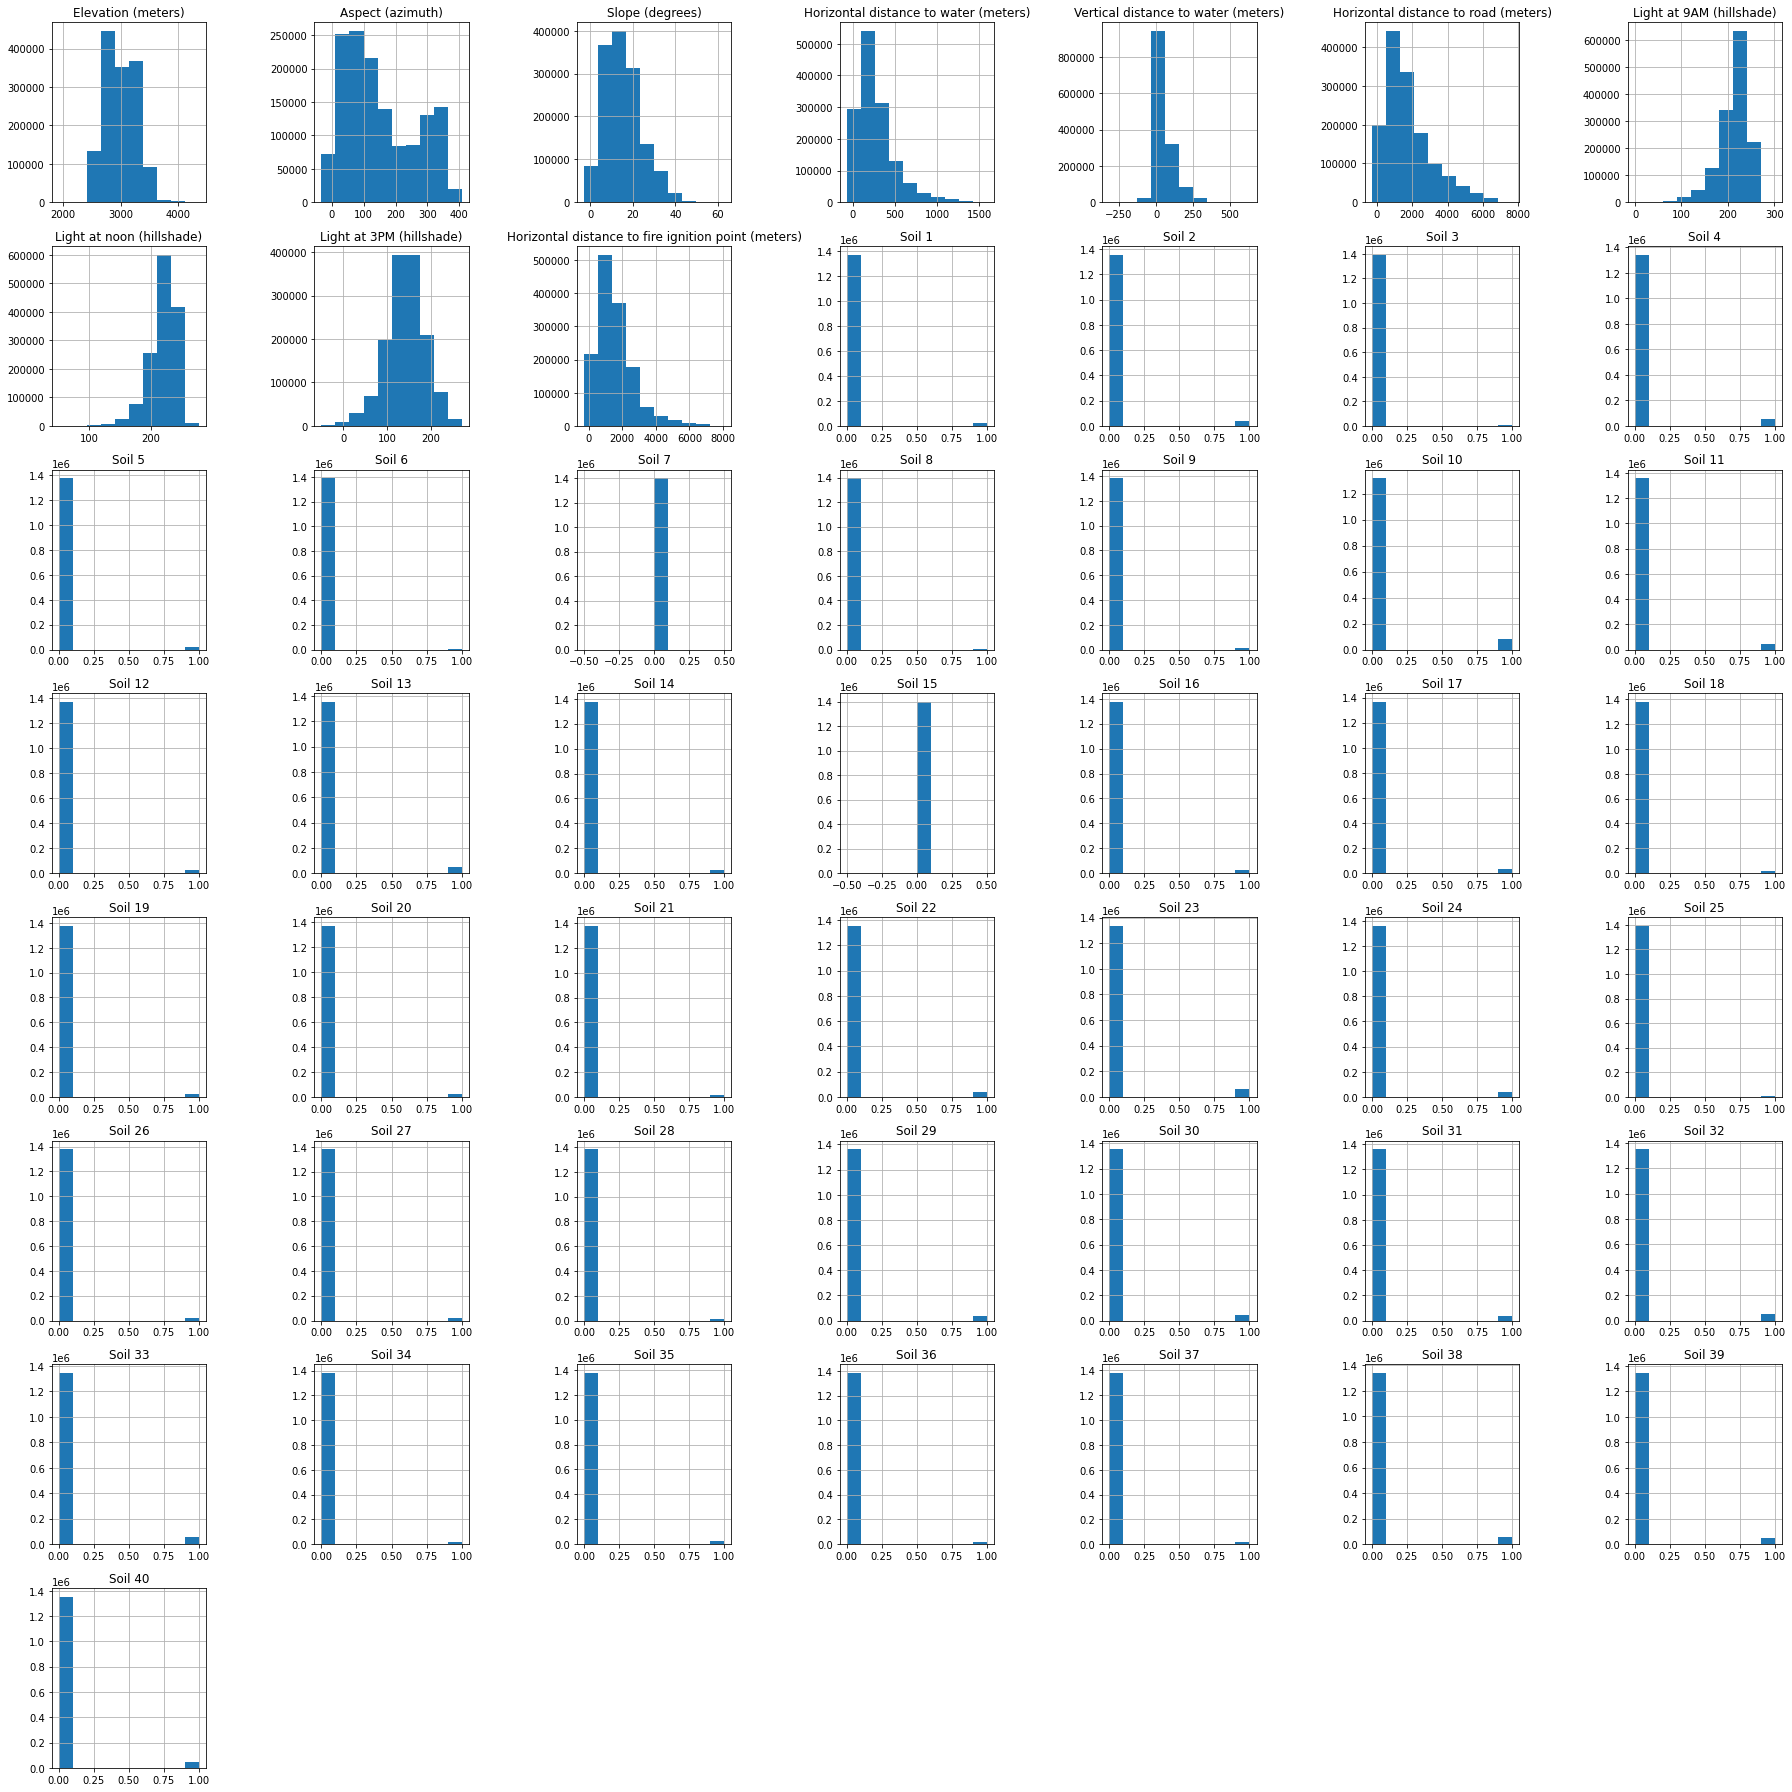

In [ ]:
# Histograms below

raw_data.hist(figsize=(25, 25))
plt.tight_layout()
plt.show()


We can see that there are no instances of soil type 7 and 15.
Furthermore, one can see that most of the data is skewed, which can affect the results later.

In [ ]:
# Removing the columns soil 7 and soil 15

raw_data.drop(columns=["Soil 7", "Soil 15"], inplace=True)
test_data.drop(columns=["Soil 7", "Soil 15"], inplace=True)


In [ ]:
raw_data.iloc[:,0:11].head()
le = LabelEncoder() 

dummies = pd.get_dummies(raw_data["National Park"], drop_first=True)
raw_data["Forest type"] = le.fit_transform(raw_data["Forest type"])

enc_data = pd.concat([raw_data, dummies], axis=1)
enc_data = enc_data._get_numeric_data()

enc_data.head()

,Elevation (meters),Aspect (azimuth),Slope (degrees),Horizontal distance to water (meters),Vertical distance to water (meters),Horizontal distance to road (meters),Light at 9AM (hillshade),Light at noon (hillshade),Light at 3PM (hillshade),Horizontal distance to fire ignition point (meters),...,Soil 35,Soil 36,Soil 37,Soil 38,Soil 39,Soil 40,Forest type,Mount Rainer,Yellowstone,Yosemite
0,3204,65,22,55,83,566,195,214,128,1814,...,0,0,0,0,0,0,0,1,0,0
1,2688,309,34,278,61,224,250,223,44,128,...,0,0,0,0,0,0,1,1,0,0
2,3137,267,13,149,37,3146,190,256,165,1075,...,0,0,1,0,0,0,0,1,0,0
3,3286,300,7,275,56,147,241,167,155,-134,...,0,0,0,0,0,0,1,1,0,0
4,2864,82,3,221,136,2184,202,250,185,1287,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
test_data.iloc[:,0:11].head()
le = LabelEncoder()

dummies_test = pd.get_dummies(test_data["National Park"], drop_first=True)
enc_test = pd.concat([test_data, dummies_test], axis=1) # Merging / concatenating two dataframes
enc_test = enc_test._get_numeric_data()
test_data.head()

,National Park,Elevation (meters),Aspect (azimuth),Slope (degrees),Horizontal distance to water (meters),Vertical distance to water (meters),Horizontal distance to road (meters),Light at 9AM (hillshade),Light at noon (hillshade),Light at 3PM (hillshade),...,Soil 31,Soil 32,Soil 33,Soil 34,Soil 35,Soil 36,Soil 37,Soil 38,Soil 39,Soil 40
0,Mount Rainer,2590,128,32,32,7,507,219,227,182,...,0,0,0,0,0,0,0,0,0,0
1,Mount Rainer,3107,112,18,961,2,1168,179,215,101,...,0,0,0,0,0,0,0,0,0,0
2,Mount Rainer,3018,280,10,394,16,1922,233,235,149,...,0,0,0,0,0,0,0,0,0,0
3,Mount Rainer,3268,73,7,485,81,3463,238,211,135,...,0,0,0,0,0,0,0,0,0,1
4,Mount Rainer,3474,340,13,815,47,1848,241,193,148,...,0,0,0,0,0,0,0,0,0,0


We are making dummies out of the categorical column "National Park" and later concatenating the dummies with the original dataframe.

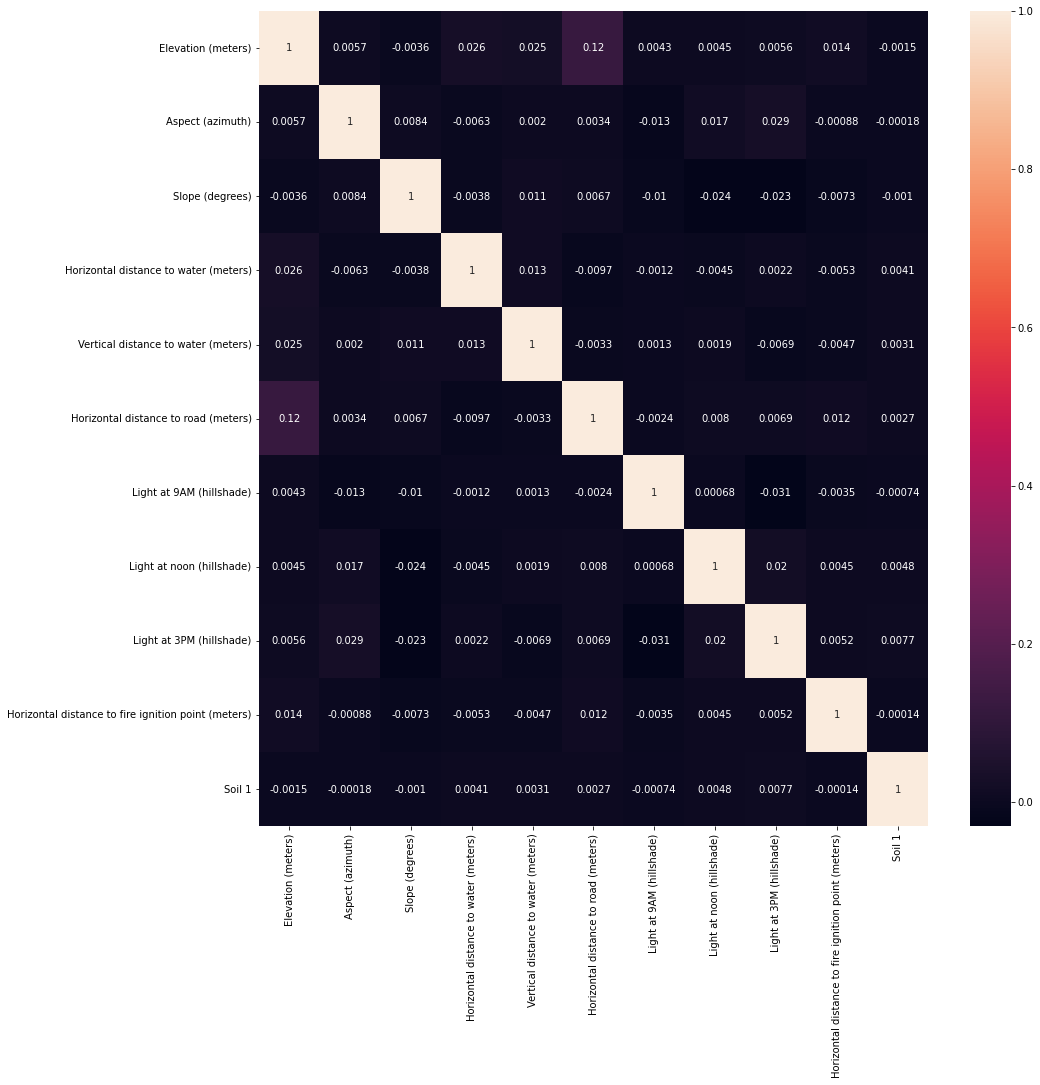

In [ ]:
plt.figure(figsize=(15, 15)) # Making it big for easier inspection
sliced_data = enc_data.iloc[:,0:11]
corr_matrix1 = sliced_data.corr()

sns.heatmap(corr_matrix1, annot=True)
plt.show()

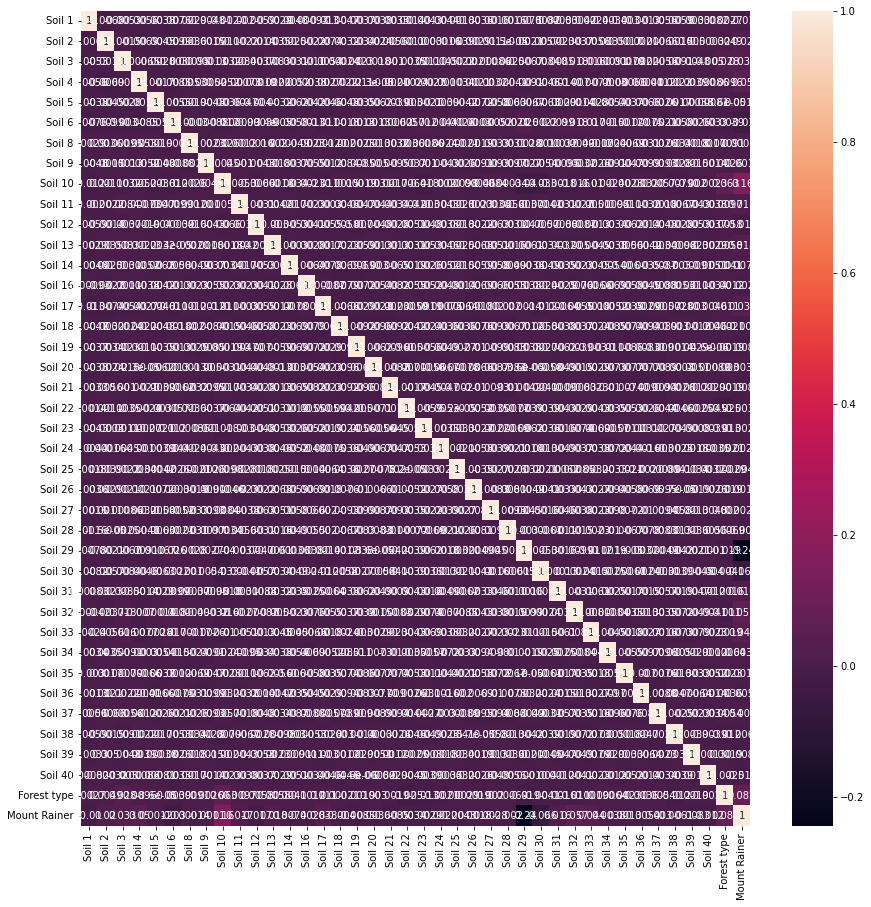

In [ ]:
plt.figure(figsize=(15, 15)) # Making it big for easier inspection
sliced_data = enc_data.iloc[:,10:50]
corr_matrix1 = sliced_data.corr()

sns.heatmap(corr_matrix1, annot=True)
plt.show()


# there is almost no correlation between the soils.

As mentioned under the histograms, there are no instances of soil 7 and soil 15. This is further visualised in the heatmap shown above.
Furthermore, one can see from the heatmap that the soils have little to no correleation between them.

# Modelling

## 1. Scikit-learn

To be honest, we had more problems with our SCI-kit models than with our ANN model. That is because we tried to do a grid search on Gradient Boosting Classifier and SVC. Since the dataset is enormous, the process of training the models took several hours. That is why we removed grid search altogether and even changed which models we use. Therefore, we use Logistic Regression instead of SVC and Random Forest instead of Gradient Boosting Classifier. 

Furthermore, we did not test the Random Forest on all the data as a whole, because the model did not stop running even after three hours. Additionally, 
we just want to mention that all the models did relatively well on the same problem in terms of accuracy. Only difference is that our ANN model was on average faster than our shallow learning models when we tried to tune them. Without tuning, our shallow learning models were faster than our ANN model.

### Classification model based on algorithms from scikit-learn (e.g. logistic regression, possibly regularized, Support Vector Classifier, etc.).

In [ ]:
# Code for scikit-learn based model

X = enc_data.drop(["Forest type"], axis=1)
y = enc_data["Forest type"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=21)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (978666, 51)
X_test:  (419429, 51)
y_train:  (978666,)
y_test:  (419429,)


Scaling the data below for use in logistic regression

In [ ]:
# Scaling the data with StandardScaler()

sc = StandardScaler()
sc.fit(X_train)


# Transform (standardise) both X_train and X_test with mean and STD from 
# training data

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=21,
                       n_jobs=-1),).fit(X_train_sc, y_train)
    
lr.predict(X_test_sc)



print('Logistic Regression training data accuracy: {0:.4f}'.format(
    lr.score(X_train_sc, y_train)))

print('Logistic Regression test data accuracy: {0:.4f}'.format(
    lr.score(X_test_sc, y_test)))



Logistic Regression training data accuracy: 0.9455
Logistic Regression test data accuracy: 0.9452


### Ensemble model (e.g. random forest or similar)

Ensemble model of Random Forest Classifier

In [ ]:
rand = RandomForestClassifier(random_state=21,
                                 n_estimators= 100,
                                 max_features= "auto"
                                 )

In [ ]:
rand.fit(X_train, y_train) # training the random forest
# Should have trained with the whole data X and y but it took too much time 

RandomForestClassifier(random_state=21)

In [ ]:
print('Random forest training data accuracy: {0:.4f}'.format(
    rand.score(X_train, y_train)))

print('Random forest test data accuracy: {0:.4f}'.format(
    rand.score(X_test, y_test)))

Random forest training data accuracy: 1.0000
Random forest test data accuracy: 0.9740


## 2. Neural Network with Keras

When we started we made the mistake of not using the sigmoid activation function nor the binary crossentropy loss function. Because of this, our results started out quite bad, but after realizing this we quickly fixed it.
We have also tried several different activation functions like PreLU and Swish, but quickly settled with ELU. In terms of optimizers, we found out that the standard Adam works best. Much better than Adagrad and Adadelta, but only slightly better than rmsprop. We also started with few neurons, but quickly found out that using big handfuls of neurons was the best option.

We used many attempts to get above the beat me since we could not get past 96% for the first few days. After a while we managed that by using ELU starting with 1024 neurons and halving the number for each layer. All in all, this task required a lot of trial and error in terms of tuning the ANN model.


In [66]:
# Code for creating and training a ANN with Keras

model = models.Sequential([
    layers.Dense(1024, activation ="ELU"),
    layers.Dense(512, activation = "ELU"),
    layers.Dense(256, activation = "ELU"),
    layers.Dense(128, activation = "ELU"),
    layers.Dense(64, activation = "ELU"),
    layers.Dense(1, activation = "sigmoid")])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='loss', patience=5)

# Fit model (in the same manner as you would with scikit-learn)
model.fit(X_train, 
          y_train,
          epochs=100,
          callbacks= callback,
          batch_size=160,
          validation_split=0.4)


Epoch 1/100
3670/3670 [==============================] - 19s 5ms/step - loss: 0.3854 - accuracy: 0.8839 - val_loss: 0.1831 - val_accuracy: 0.9215
Epoch 2/100
3670/3670 [==============================] - 18s 5ms/step - loss: 0.1532 - accuracy: 0.9375 - val_loss: 0.1219 - val_accuracy: 0.9499
Epoch 3/100
3670/3670 [==============================] - 21s 6ms/step - loss: 0.1220 - accuracy: 0.9483 - val_loss: 0.1063 - val_accuracy: 0.9546
Epoch 4/100
3670/3670 [==============================] - 18s 5ms/step - loss: 0.1072 - accuracy: 0.9544 - val_loss: 0.0863 - val_accuracy: 0.9648
Epoch 5/100
3670/3670 [==============================] - 20s 5ms/step - loss: 0.1016 - accuracy: 0.9565 - val_loss: 0.1249 - val_accuracy: 0.9438
Epoch 6/100
3670/3670 [==============================] - 20s 6ms/step - loss: 0.0954 - accuracy: 0.9596 - val_loss: 0.0809 - val_accuracy: 0.9661
Epoch 7/100
3670/3670 [==============================] - 18s 5ms/step - loss: 0.0911 - accuracy: 0.9611 - val_loss: 0.0782 -

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              53248     
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 750,593
Trainable params: 750,593
Non-tr

In [68]:
predictions = model.predict(enc_test)

In [69]:
model.evaluate(X_test, y_test)

13108/13108 [==============================] - 29s 2ms/step - loss: 0.0730 - accuracy: 0.9681


[0.07301066070795059, 0.9680947065353394]

### ANN Results

Report on your best ANN found and print out relevant metrics

In [70]:

submission_df = pd.DataFrame(data=list(range(len(predictions))), 
                             columns=["Index"])

submission_df["Predicted"] = predictions
submission_df = submission_df.round(0)
                                    
submission_df['Predicted'] = np.where(submission_df['Predicted'] == 1,
                                      "Lodgepole", "Cottonwood")

submission_df.to_csv("CA1_goofy_submission4.csv", index=False)
submission_df


,Index,Predicted
0,0,Lodgepole
1,1,Lodgepole
2,2,Lodgepole
3,3,Cottonwood
4,4,Cottonwood
...,...,...
599179,599179,Lodgepole
599180,599180,Lodgepole
599181,599181,Lodgepole
599182,599182,Cottonwood


# Discussion / conclusion

Provide a summary of the assignment: (you are required to address **the first three** points of the list below)
- obstacles / problems you have met regarding the modelling proces
- degree of success of the three models
- given more time, what would be done differently
- further comments (if any)

We had problems running the ensemble classifier, especially when using the support vector classifier. The main problem was the amount of time it took to run the code for the whole training data. Later we decided to use a logistic regressor to classify. We also had to preprocess the data differently than we initially had planned. We first used the LabelEncoder for categorical data in column National Park, but then changed it to dummies. Given more time, we would experiment with other activation and loss functions. We had some ideas to make the model more complex without overfitting it, as in adding more layers and implement more neurons to the layers. 

To conclude, our models were all quite accurate on predicting with an average of about 97%. The only difference were how fast the models were at training, where the shallow learning models did not hold well against our ANN model when doing grid searches.